In [12]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

In [13]:
clinical_data_path = 'L:\\basic\\Personal Archive\\E\\emquist\\parsing_MRI\\final_test_seg\\LOG\\clin_merged_lge.csv'
clinical_df = pd.read_csv(clinical_data_path)
lge_og_path = 'L:\\basic\Personal Archive\E\emquist\parsing_MRI\\final_test_seg\lge_sax_psir_mri_good_shape'

myo_og_path =  'L:\\basic\Personal Archive\E\emquist\parsing_MRI\\final_test_seg\myo_pred_all_lge'

In [14]:
labels = 'AppropriateTherapy'
# # print(clinical_df[labels])

# print(clinical_df[labels].value_counts())
# print((clinical_df[labels].value_counts() / len(clinical_df[labels])) * 100)
# # print((541/988) * 100)

clinical_df['total_NICM'] = clinical_df.loc[:, ['NICM', 'DCM', 'PAS', 'HCM']].sum(axis=1)
print(clinical_df['ICM'].value_counts())

print((clinical_df[labels].value_counts() / len(clinical_df[labels])) * 100)

ICM_filtered = clinical_df.loc[(clinical_df['MtillDeath_censored'] >= 12.000000) | (clinical_df['Mortality'] == 1)]

print(ICM_filtered[labels].value_counts())
print((ICM_filtered[labels].value_counts() / len(ICM_filtered[labels])) * 100)

ICM
0    589
1    399
Name: count, dtype: int64
AppropriateTherapy
0    73.380567
1    26.619433
Name: count, dtype: float64
AppropriateTherapy
0    610
1    252
Name: count, dtype: int64
AppropriateTherapy
0    70.765661
1    29.234339
Name: count, dtype: float64


In [15]:
labels = ['ICM', 'NICM', 'HCM', 'DCM', 'MyocardialInfarction']
print(clinical_df[labels])
print(clinical_df['LowLVEF'].value_counts())

     ICM  NICM  HCM  DCM  MyocardialInfarction
0      0     0    0    1                     0
1      0     0    0    1                     1
2      0     0    1    0                     0
3      0     0    0    0                     0
4      0     0    1    0                     0
..   ...   ...  ...  ...                   ...
983    0     0    0    0                     1
984    0     0    0    0                     0
985    0     0    0    1                     0
986    0     0    0    0                     0
987    1     0    0    0                     1

[988 rows x 5 columns]
LowLVEF
1    536
0    452
Name: count, dtype: int64


In [16]:
primair_data = clinical_df[clinical_df['Implantation_indication'] == 1]

print(primair_data['ICM'].value_counts())

ICM
0    332
1    209
Name: count, dtype: int64


In [17]:
test = primair_data['MtillDeath_censored'].astype(float)
# print(primair_data['MtillDeath_censored'].value_counts())
print(test)

0      132.928131
1        8.903491
2      121.429158
3       76.090349
4      139.433265
          ...    
977      0.000000
979      0.032258
980      0.129032
982      0.225806
984      0.612903
Name: MtillDeath_censored, Length: 541, dtype: float64


In [18]:
# Make a copy to avoid the SettingWithCopyWarning
primair_data = primair_data.copy()

# Sum the columns 'NICM', 'DCM', and 'PAS' to create a new column 'total_NICM'
primair_data['total_NICM'] = primair_data.loc[:, ['NICM', 'DCM', 'PAS', 'HCM']].sum(axis=1)
print(primair_data['total_NICM'].value_counts())

total_NICM
1    282
0    259
Name: count, dtype: int64


In [19]:
print(primair_data['StudyID'].nunique())
print(primair_data['MRI_ID'].nunique())

486
486


In [20]:
# Remove duplicates based on the 'id' column, keeping the last occurrence
df_no_duplicates = primair_data.drop_duplicates(subset=['StudyID'], keep='last')
print(df_no_duplicates['total_NICM'].value_counts())
print(df_no_duplicates['ICM'].value_counts())

total_NICM
1    256
0    230
Name: count, dtype: int64
ICM
0    295
1    191
Name: count, dtype: int64


In [21]:
duplicate_entries_first = primair_data[primair_data.duplicated(subset=['StudyID'], keep='first')]
duplicate_entries_last = primair_data[primair_data.duplicated(subset=['StudyID'], keep='last')]


In [22]:
keep_duplicate_entries_first = primair_data.drop_duplicates(subset=['StudyID'], keep='first')
# keep_duplicate_entries_first.head(36)

In [23]:
print(len(duplicate_entries_first))
duplicate_entries_first.head(n=10)

55


,LGE_paths,LGE_shape,LGE_number,LGE_filename,StudyID,MRI_ID,Unnamed: 0,StudyID_x,Python_ID_Index,Age,...,ICDnonbenefit_4Y,ICDnonbenefit_3Y,ICDnonbenefit_2Y,ICDnonbenefit_1Y,FU_1Y,FU_2Y,FU_3Y,FU_4Y,FU_5Y,total_NICM
35,L:\basic\Personal Archive\E\emquist\parsing_MR...,"(216, 288, 10)",74,sagittal_tfi_psir_single-shot_10sl_ipat_sa_psi...,DIST_2891,20131019_A0081,901,DIST_2891,901,51.800137,...,0,0,0,0,1,1,1,1,1,1
65,L:\basic\Personal Archive\E\emquist\parsing_MR...,"(184, 256, 7)",111,sagittal_tfl20_t1_late_enh_7_sl_korte_as_psir_...,DIST_1638,20160728_A0770,1791,DIST_1638,1791,59.997262,...,0,0,0,0,1,1,1,0,0,1
81,L:\basic\Personal Archive\E\emquist\parsing_MR...,"(288, 288, 13)",128,"transverse_2d_sax_psir_viability_vroeg_(288,28...",DIST_1330,20170404_A0269,577,DIST_1330,577,51.274470,...,0,0,0,0,1,1,1,1,0,0
103,L:\basic\Personal Archive\E\emquist\parsing_MR...,"(384, 384, 12)",152,"sagittal_psir_tfe_bh_sa_ti_300_(384,384).nii.gz",DIST_3654,20180123_A0328,951,DIST_3654,951,63.285421,...,0,0,0,0,1,1,0,0,0,0
107,L:\basic\Personal Archive\E\emquist\parsing_MR...,"(192, 192, 15)",156,sagittal_de_overview_sax_2ch_4ch_3ch_psir_(192...,DIST_3600,20180226_A0992,1505,DIST_3600,1505,73.555099,...,0,0,0,0,1,1,1,0,0,1
113,L:\basic\Personal Archive\E\emquist\parsing_MR...,"(192, 192, 13)",162,sagittal_de_overview_sax_2ch_4ch_3ch_psir_(192...,DIST_1521,20180419_A0106,1713,DIST_1521,1713,63.827515,...,0,0,0,0,1,1,0,0,0,1
115,L:\basic\Personal Archive\E\emquist\parsing_MR...,"(192, 192, 11)",164,sagittal_de_overview_sax_2ch_4ch_3ch_psir_(192...,DIST_3529,20180419_A1005,1571,DIST_3529,1571,54.891170,...,0,0,0,0,1,1,0,0,0,1
117,L:\basic\Personal Archive\E\emquist\parsing_MR...,"(192, 192, 13)",166,sagittal_de_overview_sax_2ch_4ch_3ch_psir_(192...,DIST_1711,20180420_A1014,1262,DIST_1711,1262,74.020534,...,0,0,0,0,1,0,0,0,0,1
119,L:\basic\Personal Archive\E\emquist\parsing_MR...,"(186, 192, 11)",168,sagittal_de_overview_sax_4ch_2ch_3ch_psir_(192...,DIST_0853,20180421_A0319,1222,DIST_0853,1222,35.230664,...,0,0,0,0,1,1,0,0,0,0
148,L:\basic\Personal Archive\E\emquist\parsing_MR...,"(192, 192, 12)",198,"coronal_de_overview_4ch_3ch_sax_2ch_psir_(192,...",DIST_1942,20181213_A0501,1545,DIST_1942,1545,54.934976,...,0,0,0,0,1,0,0,0,0,0


In [24]:
print(len(duplicate_entries_last))
duplicate_entries_last.head(n=10)

55


,LGE_paths,LGE_shape,LGE_number,LGE_filename,StudyID,MRI_ID,Unnamed: 0,StudyID_x,Python_ID_Index,Age,...,ICDnonbenefit_4Y,ICDnonbenefit_3Y,ICDnonbenefit_2Y,ICDnonbenefit_1Y,FU_1Y,FU_2Y,FU_3Y,FU_4Y,FU_5Y,total_NICM
34,L:\basic\Personal Archive\E\emquist\parsing_MR...,"(144, 192, 10)",73,sagittal_tfi_psir_single-shot_10sl_ipat_sa_psi...,DIST_2891,20131019_A0081,901,DIST_2891,901,51.800137,...,0,0,0,0,1,1,1,1,1,1
64,L:\basic\Personal Archive\E\emquist\parsing_MR...,"(184, 256, 7)",110,sagittal_tfl20_t1_late_enh_6_sl_korte_as_psir_...,DIST_1638,20160728_A0770,1791,DIST_1638,1791,59.997262,...,0,0,0,0,1,1,1,0,0,1
80,L:\basic\Personal Archive\E\emquist\parsing_MR...,"(288, 288, 13)",127,"transverse_2d_sax_psir_viability_laat_(288,288...",DIST_1330,20170404_A0269,577,DIST_1330,577,51.274470,...,0,0,0,0,1,1,1,1,0,0
102,L:\basic\Personal Archive\E\emquist\parsing_MR...,"(384, 384, 12)",151,"sagittal_psir_tfe_bh_sa_ti_280_(384,384).nii.gz",DIST_3654,20180123_A0328,951,DIST_3654,951,63.285421,...,0,0,0,0,1,1,0,0,0,0
106,L:\basic\Personal Archive\E\emquist\parsing_MR...,"(256, 256, 15)",155,"sagittal_de_high-res_sax_psir_(256,256).nii.gz",DIST_3600,20180226_A0992,1505,DIST_3600,1505,73.555099,...,0,0,0,0,1,1,1,0,0,1
112,L:\basic\Personal Archive\E\emquist\parsing_MR...,"(256, 256, 12)",161,"sagittal_de_high-res_sax_psir_(256,256).nii.gz",DIST_1521,20180419_A0106,1713,DIST_1521,1713,63.827515,...,0,0,0,0,1,1,0,0,0,1
114,L:\basic\Personal Archive\E\emquist\parsing_MR...,"(232, 256, 11)",163,"sagittal_de_high-res_sax_psir_(256,232).nii.gz",DIST_3529,20180419_A1005,1571,DIST_3529,1571,54.891170,...,0,0,0,0,1,1,0,0,0,1
116,L:\basic\Personal Archive\E\emquist\parsing_MR...,"(256, 256, 13)",165,"sagittal_de_high-res_sax_psir_(256,256).nii.gz",DIST_1711,20180420_A1014,1262,DIST_1711,1262,74.020534,...,0,0,0,0,1,0,0,0,0,1
118,L:\basic\Personal Archive\E\emquist\parsing_MR...,"(240, 256, 11)",167,"sagittal_de_high-res_sax_psir_(256,240).nii.gz",DIST_0853,20180421_A0319,1222,DIST_0853,1222,35.230664,...,0,0,0,0,1,1,0,0,0,0
147,L:\basic\Personal Archive\E\emquist\parsing_MR...,"(256, 256, 12)",197,"coronal_de_high-res_sax_psir_(256,256).nii.gz",DIST_1942,20181213_A0501,1545,DIST_1942,1545,54.934976,...,0,0,0,0,1,0,0,0,0,0


In [25]:
# Sum the columns 'NICM', 'DCM', 'HCM' and 'PAS' to create a new column 'total_NICM'
ICM_primair_non_dup = keep_duplicate_entries_first[keep_duplicate_entries_first['ICM'] == 1]
ICM_primair_non_dup = ICM_primair_non_dup.copy()
# ICM_primair['out'] = ICM_primair.loc[:, ['FU_1Y', 'FU_2Y', 'FU_3Y', 'FU_4Y', 'FU_5Y', 'Mortality5Y', 'Mortality4Y', 'Mortality3Y', 'Mortality2Y', 'Mortality1Y']].sum(axis=1)
# print(ICM_primair['out'].value_counts())
# ICM_primair[ICM_primair['out'] == 0].iloc[:, -30:].head(n=21)
print(len(ICM_primair_non_dup))

191


In [26]:
# Identify patients who stopped censoring
# stopped_censoring = ICM_primair.loc[(ICM_primair['MonthsTillAppropriateTherapy'] <= 36.000000) | (ICM_primair['MtillDeath_censored'] <= 36.000000)] #| (ICM_primair['MtillDeath_censored'] == 0.000000)]
# print(stopped_censoring)
# Check if these patients had an event afterward
# ICM_primair['event_occured'] = (
#     (ICM_primair['AppropriateTherapy1Y'] == 1) |
#     (ICM_primair['AppropriateTherapy2Y'] == 1) |
#     (ICM_primair['AppropriateTherapy3Y'] == 1) |
#     (ICM_primair['AppropriateTherapy4Y'] == 1) |
#     (ICM_primair['AppropriateTherapy5Y'] == 1) 
#     # (ICM_primair['Mortality1Y'] == 1) |
#     # (ICM_primair['Mortality2Y'] == 1) |
#     # (ICM_primair['Mortality3Y'] == 1) |
#     # (ICM_primair['Mortality4Y'] == 1) |
#     # (ICM_primair['Mortality5Y'] == 1) |
#     # (ICM_primair['FU_1Y'] == 1) |
#     # (ICM_primair['FU_2Y'] == 1) |
#     # (ICM_primair['FU_3Y'] == 1) |
#     # (ICM_primair['FU_4Y'] == 1) |
#     # (ICM_primair['FU_5Y'] == 1)
# )



# Exclude patients who did not have an event or stopped censoring after 3 years
ICM_filtered = ICM_primair_non_dup.loc[(ICM_primair_non_dup['MonthsTillAppropriateTherapy'] >= 12.000000) | (ICM_primair_non_dup['AppropriateTherapy1Y'] == 1)]


# df_filtered = ICM_primair[~ICM_primair.index.isin(stopped_censoring_with_event.index)]
# print(df_filtered[(df_filtered['MtillDeath_censored'] == 0.000000)].head())
# df_filtered.head(n=400)
print(len(ICM_filtered))
ICM_filtered.to_csv('L:\\basic\\Personal Archive\\E\\emquist\\parsing_MRI\\final_test_seg\\LOG\\clin_merged_lge_ICM_non_dup_filtered_1y.csv', index=False)

179


In [34]:
ICM_filtered.head()
print(ICM_filtered['Mortality'].value_counts())
print(ICM_filtered['AppropriateTherapy'].value_counts())
print(ICM_filtered['MyocardialInfarction'].value_counts())
# print(ICM_filtered['Sex'].std())
# Make a copy to avoid the SettingWithCopyWarning
test_filtered = ICM_filtered.copy()

# # Sum the columns 'NICM', 'DCM', and 'PAS' to create a new column 'total_NICM'
# test_filtered['total_mortality'] = test_filtered.loc[:, ['Mortality1Y', 'Mortality2Y', 'Mortality3Y', 'Mortality4Y', 'Mortality5Y']].sum(axis=1)
# print(test_filtered['total_mortality'].value_counts())

# # Sum the columns 'NICM', 'DCM', and 'PAS' to create a new column 'total_NICM'
# test_filtered['total_AppropriateTherapy'] = test_filtered.loc[:, ['AppropriateTherapy1Y', 'AppropriateTherapy2Y', 'AppropriateTherapy3Y', 'AppropriateTherapy4Y', 'AppropriateTherapy5Y']].sum(axis=1)
# print(test_filtered['total_AppropriateTherapy'].value_counts())

# mort = test_filtered.loc[
#     ((test_filtered['total_mortality'] == 0) &
#     (test_filtered['Mortality'] == 1))
# ]

# mort.head()

Mortality
0    141
1     38
Name: count, dtype: int64
AppropriateTherapy
0    138
1     41
Name: count, dtype: int64
MyocardialInfarction
1    144
0     35
Name: count, dtype: int64


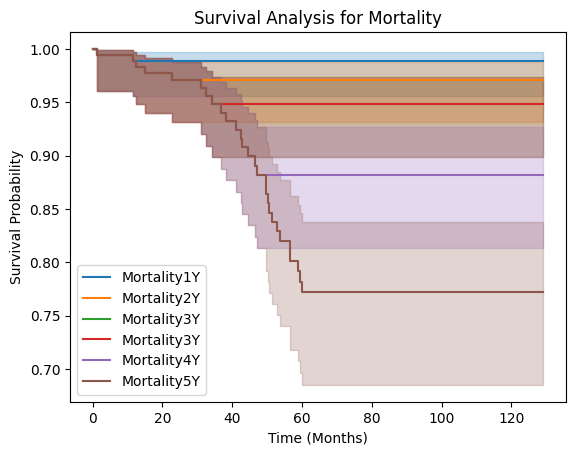

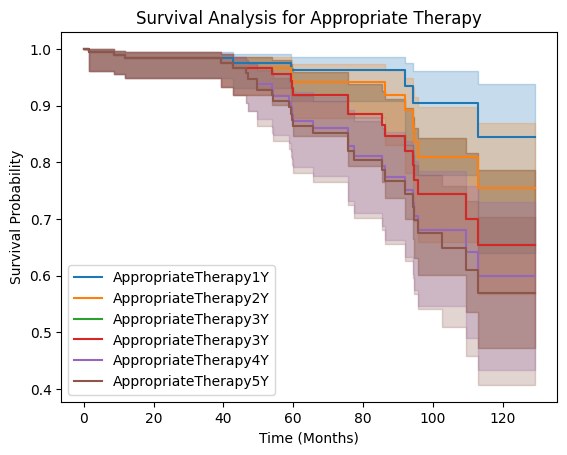

In [28]:
# Survival analysis for mortality
kmf_mortality = KaplanMeierFitter()
# Let's assume your dataset has the following columns
time_col = 'MtillDeath_censored'
event_col_mortality = ['Mortality1Y', 'Mortality2Y', 'Mortality3Y', 'Mortality3Y', 'Mortality4Y', 'Mortality5Y']
event_col_therapy = ['AppropriateTherapy1Y', 'AppropriateTherapy2Y', 'AppropriateTherapy3Y', 'AppropriateTherapy3Y', 'AppropriateTherapy4Y', 'AppropriateTherapy5Y']

for col in event_col_mortality:
    mask = ICM_filtered[col].notna()  # Exclude rows where mortality information is missing
    kmf_mortality.fit(durations=ICM_filtered[mask][time_col], event_observed=ICM_filtered[mask][col], label=col)
    kmf_mortality.plot_survival_function()

plt.title('Survival Analysis for Mortality')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.show()

# Survival analysis for appropriate therapy
kmf_therapy = KaplanMeierFitter()

for col in event_col_therapy:
    mask = ICM_filtered[col].notna()  # Exclude rows where therapy information is missing
    kmf_therapy.fit(durations=ICM_filtered[mask][time_col], event_observed=ICM_filtered[mask][col], label=col)
    kmf_therapy.plot_survival_function()

plt.title('Survival Analysis for Appropriate Therapy')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.show()

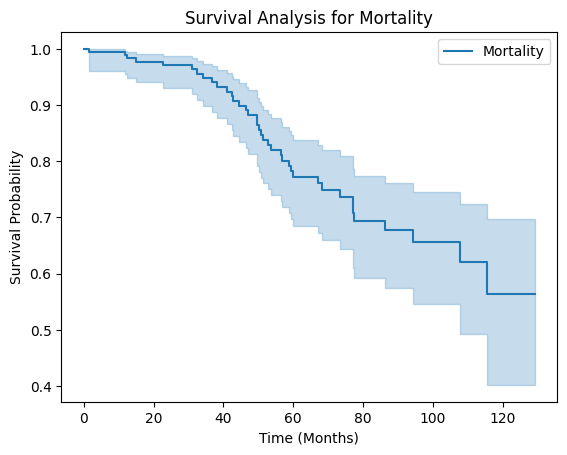

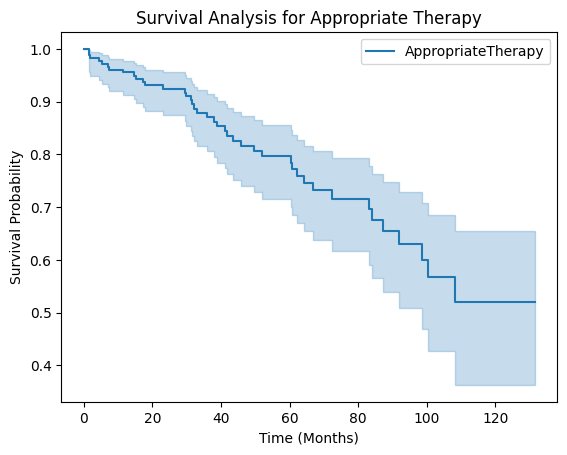

In [29]:
# Survival analysis for mortality
kmf_mortality = KaplanMeierFitter()
# Let's assume your dataset has the following columns
time_col = 'MtillDeath_censored'
event_col_mortality = ['Mortality']
event_col_therapy = ['AppropriateTherapy']

for col in event_col_mortality:
    mask = ICM_filtered[col].notna()  # Exclude rows where mortality information is missing
    kmf_mortality.fit(durations=ICM_filtered[mask][time_col], event_observed=ICM_filtered[mask][col], label=col)
    kmf_mortality.plot_survival_function()

plt.title('Survival Analysis for Mortality')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.show()

# Survival analysis for appropriate therapy
kmf_therapy = KaplanMeierFitter()
time_col_therapy = 'MonthsTillAppropriateTherapy'
for col in event_col_therapy:
    mask = ICM_filtered[col].notna()  # Exclude rows where therapy information is missing
    kmf_therapy.fit(durations=ICM_filtered[mask][time_col_therapy], event_observed=ICM_filtered[mask][col], label=col)
    kmf_therapy.plot_survival_function()

plt.title('Survival Analysis for Appropriate Therapy')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.show()

In [30]:
for col in clinical_df.columns:
    print(col)

LGE_paths
LGE_shape
LGE_number
LGE_filename
StudyID
MRI_ID
Unnamed: 0
StudyID_x
Python_ID_Index
Age
Sex
AtrialArrhythmia
LowLVEF
ReducedLVEF
NormalLVEF
OHCA
ICM
NICM
HCM
DCM
PAS
PCI
CABG
MyocardialInfarction
VF
NSVT
SustVT
CVA
COPD
DiabetesMellitus
BMI
PAF
QRS_Duration
Hypertension
CHD
Sodium
Potassium
Kreatinine
Dyslipedaemia
Diuretica
VR
DR
CRTD
SICD
Vitamine_K
Antiaritmica_soort#Sotalol
ImplantationDate
Antiaritmica_soort#Digoxine
Antiaritmica_soort#Amiodarone
Betablokker
NOAC
Aldosteronremmer
Implantation_indication
Mortality
MtillDeath_censored
AppropriateTherapy
MonthsTillAppropriateTherapy
AppropriateTherapyType
Shock
Shock/ATP
ATP
PatientID
AppropriateTherapy5Y
AppropriateTherapy4Y
AppropriateTherapy3Y
AppropriateTherapy2Y
AppropriateTherapy1Y
Mortality5Y
Mortality4Y
Mortality3Y
Mortality2Y
Mortality1Y
ICDnonbenefit
ICDnonbenefit_5Y
ICDnonbenefit_4Y
ICDnonbenefit_3Y
ICDnonbenefit_2Y
ICDnonbenefit_1Y
FU_1Y
FU_2Y
FU_3Y
FU_4Y
FU_5Y
total_NICM
